<ipython-input-4-245b9f6e45ea>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  inception.load_state_dict(torch.load('/content/drive/MyDrive/project2 /inception_finetuningp

预测的品种: papillon


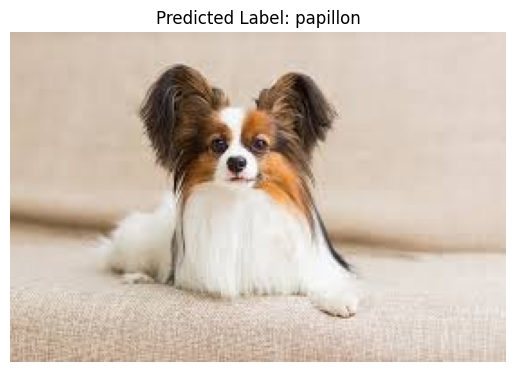

所有品种及其概率:
Afghan_hound: 0.0000
African_hunting_dog: 0.0000
Airedale: 0.0000
American_Staffordshire_terrier: 0.0000
Appenzeller: 0.0000
Australian_terrier: 0.0000
Bedlington_terrier: 0.0000
Bernese_mountain_dog: 0.0000
Blenheim_spaniel: 0.0000
Border_collie: 0.0000
Border_terrier: 0.0000
Boston_bull: 0.0000
Bouvier_des_Flandres: 0.0000
Brabancon_griffon: 0.0000
Brittany_spaniel: 0.0000
Cardigan: 0.0000
Chesapeake_Bay_retriever: 0.0000
Chihuahua: 0.0000
Dandie_Dinmont: 0.0000
Doberman: 0.0000
English_foxhound: 0.0000
English_setter: 0.0000
English_springer: 0.0000
EntleBucher: 0.0000
Eskimo_dog: 0.0000
French_bulldog: 0.0000
German_shepherd: 0.0000
German_short: 0.0000
Gordon_setter: 0.0000
Great_Dane: 0.0000
Great_Pyrenees: 0.0000
Greater_Swiss_Mountain_dog: 0.0000
Ibizan_hound: 0.0000
Irish_setter: 0.0000
Irish_terrier: 0.0000
Irish_water_spaniel: 0.0000
Irish_wolfhound: 0.0000
Italian_greyhound: 0.0000
Japanese_spaniel: 0.0002
Kerry_blue_terrier: 0.0000
Labrador_retriever: 0.0000
Lake

In [4]:
import torch
import torch.nn as nn  # 导入 nn 模块
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision import models
import kagglehub  # 导入 kagglehub
import pandas as pd
import torchvision.models as models
import torchvision.transforms as transforms
from albumentations import Normalize
from albumentations.pytorch.transforms import ToTensorV2
from sklearn.metrics import accuracy_score
from albumentations import Compose, Normalize
from albumentations.pytorch import ToTensorV2

# 定义设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
all_breeds = ['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog', 'German_shepherd', 'German_short', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Mexican_hairless', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pekinese', 'Pembroke', 'Pomeranian', 'Rhodesian_ridgeback', 'Rottweiler', 'Saint_Bernard', 'Saluki', 'Samoyed', 'Scotch_terrier', 'Scottish_deerhound', 'Sealyham_terrier', 'Shetland_sheepdog', 'Shih', 'Siberian_husky', 'Staffordshire_bullterrier', 'Sussex_spaniel', 'Tibetan_mastiff', 'Tibetan_terrier', 'Walker_hound', 'Weimaraner', 'Welsh_springer_spaniel', 'West_Highland_white_terrier', 'Yorkshire_terrier', 'affenpinscher', 'basenji', 'basset', 'beagle', 'black', 'bloodhound', 'bluetick', 'borzoi', 'boxer', 'briard', 'bull_mastiff', 'cairn', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly', 'dhole', 'dingo', 'flat', 'giant_schnauzer', 'golden_retriever', 'groenendael', 'keeshond', 'kelpie', 'komondor', 'kuvasz', 'malamute', 'malinois', 'miniature_pinscher', 'miniature_poodle', 'miniature_schnauzer', 'otterhound', 'papillon', 'pug', 'redbone', 'schipperke', 'silky_terrier', 'soft', 'standard_poodle', 'standard_schnauzer', 'toy_poodle', 'toy_terrier', 'vizsla', 'whippet', 'wire']
# 加载保存的模型
inception = models.inception_v3(pretrained=True)
fc_inputs = inception.fc.in_features
inception.fc = nn.Sequential(
    nn.Linear(fc_inputs, 2048),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(2048, 120),
    nn.LogSoftmax(dim=1)
)
inception.load_state_dict(torch.load('/content/drive/MyDrive/project2 /inception_finetuningphr.pth')) # 加载你保存的模型权重
inception = inception.to(device)
inception.eval()  # 设置为评估模式

# 定义图像预处理
valid_transform = Compose([Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), ToTensorV2()], p=1)

def predict_single_image(image_path):
    """
    预测单张图像的类别.

    Args:
        image_path: 图像的路径.

    Returns:
        预测的类别索引, 概率张量.
    """
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"无法加载图像：{image_path}")  # 清晰的错误信息
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (299, 299))
        img = valid_transform(image=img)['image']
        img = img.unsqueeze(0).to(device)

        with torch.no_grad():
            output = inception(img)
            probabilities = torch.exp(output)
            predicted_class = torch.argmax(probabilities, dim=1)
        return predicted_class.item(), probabilities

    except FileNotFoundError as e:
        print(e)
        return None, None  # 返回 None 表示错误
    except Exception as e:
        print(f"发生错误: {e}")
        return None, None



#  测试你自己的图像
test_image_path = "/content/pap.jpg"  # 你自己的图像路径
predicted_class, probabilities = predict_single_image(test_image_path)


if predicted_class is not None: # 检查是否发生错误
    predicted_label = all_breeds[predicted_class]  # 获取预测的品种名称
    print(f"预测的品种: {predicted_label}")

    # 显示图像和预测结果
    img = cv2.imread(test_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()


    # 打印所有品种及其对应的概率
    print("所有品种及其概率:")
    for i, prob in enumerate(probabilities[0]):
        print(f"{all_breeds[i]}: {prob.item():.4f}")